In [1]:
%pylab inline
import pandas as pd
import os
import glob

Populating the interactive namespace from numpy and matplotlib


In [2]:
from pylab import rcParams
rcParams['figure.figsize'] = 10, 4

In [3]:
latest_log = sorted(glob.glob('../outputs/*.log'))[-1]
latest_log

'../outputs/train_2018-12-07_07-38-26.log'

In [4]:
def parse_log(infile):
    datas = []
    data = {}
    for line in open(infile).readlines():
        if line.startswith('metric'):
            _, name, val = line.strip('\n').split(' ', 2)
            val = float(val)
            if name=='episodeSteps':
                steps=val
                if len(data): datas.append(data)
                data = {}
            data[name] = val

    df = pd.DataFrame(datas)
    df = df.set_index('steps')
    return df

In [5]:
df = parse_log(latest_log)

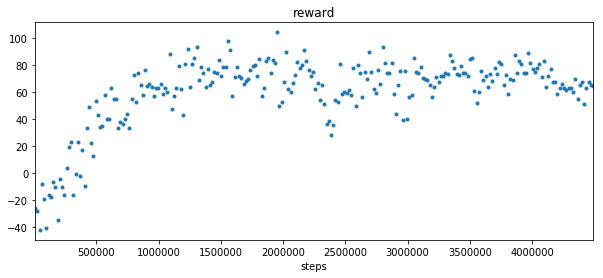

In [6]:
df['reward'].plot(style='.', title='reward')

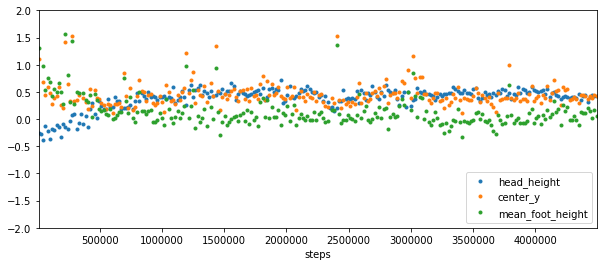

In [15]:
df[['head_height','center_y','mean_foot_height']].plot(style='.', ylim=[-2,2])

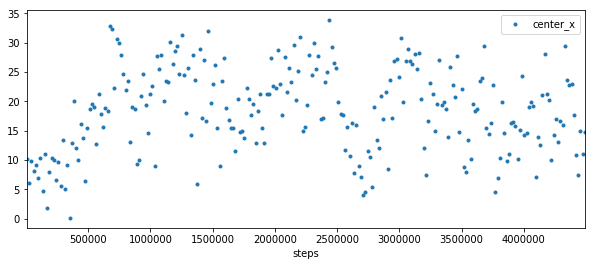

In [8]:
df[['center_x']].plot(style='.')

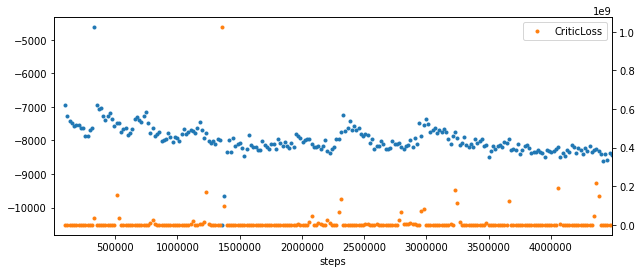

In [9]:
df['ActorLoss'].plot(style='.')
df['CriticLoss'].plot(style='.', secondary_y=True, ax=plt.gca())
plt.legend()

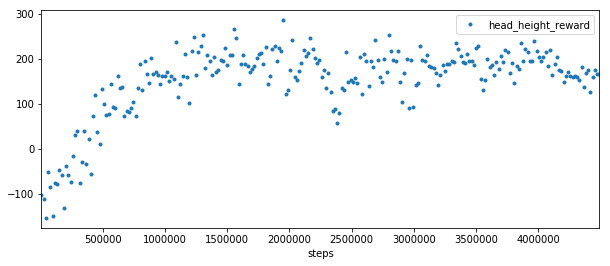

In [10]:
df[['head_height_reward']].plot(style='.')

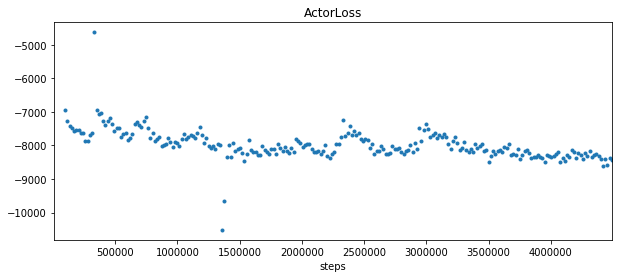

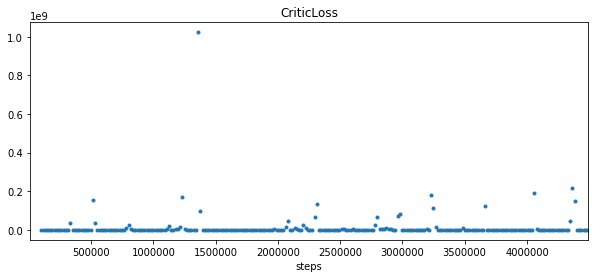

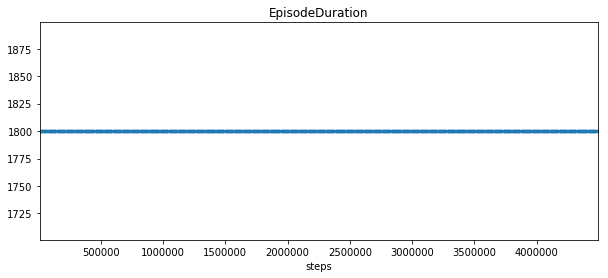

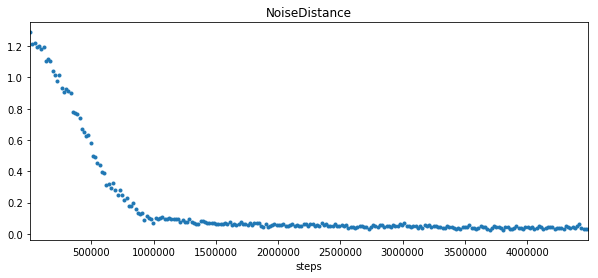

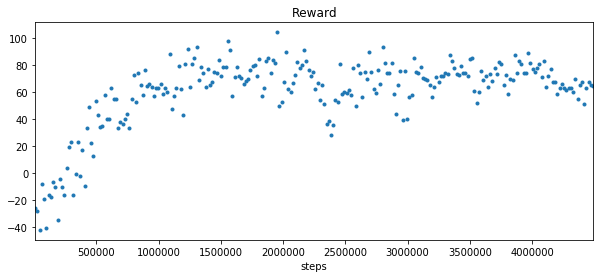

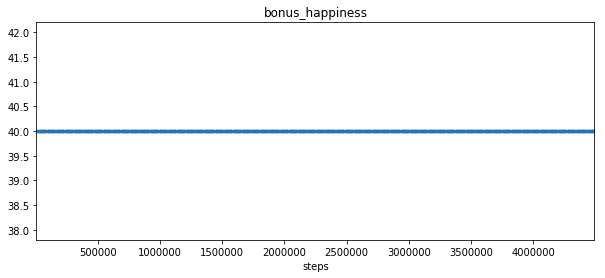

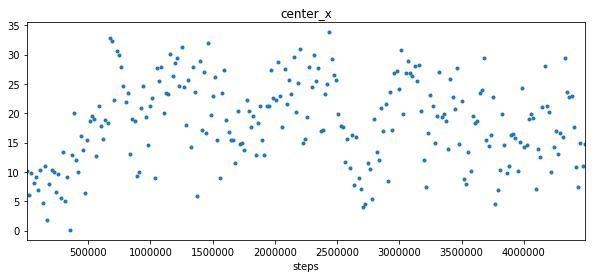

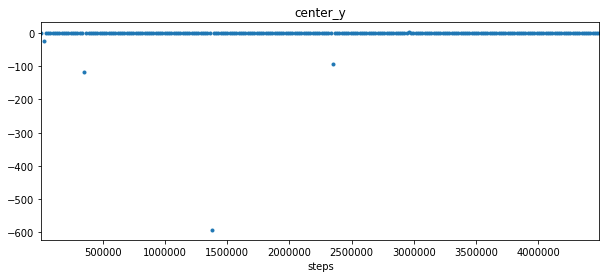

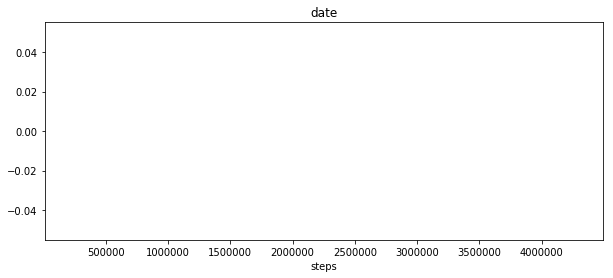

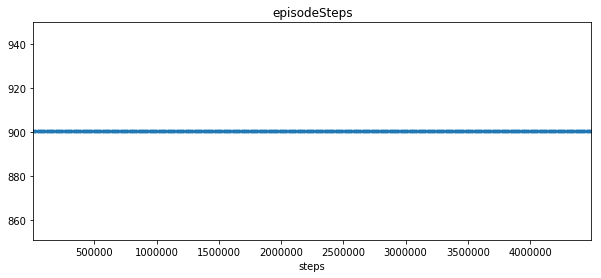

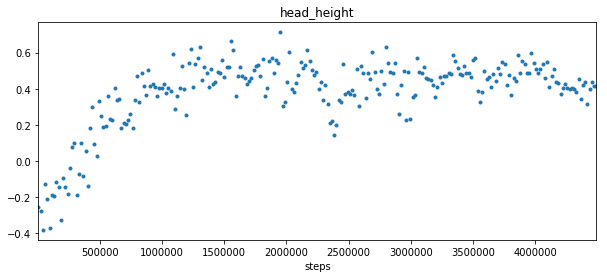

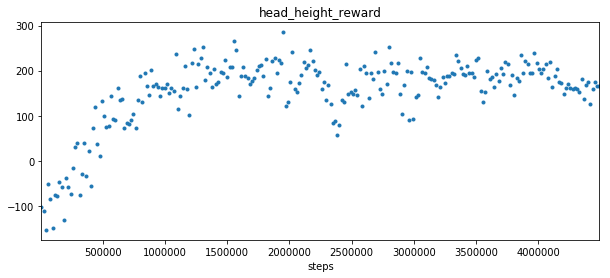

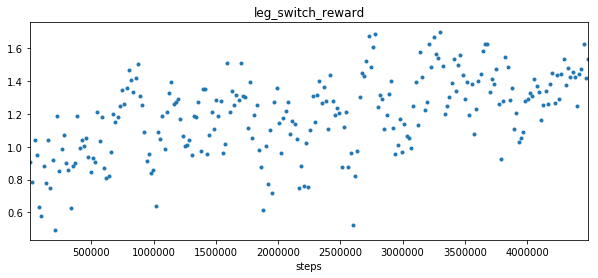

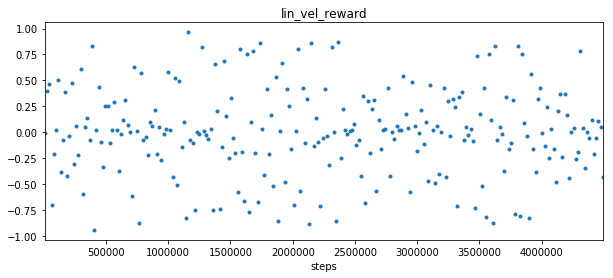

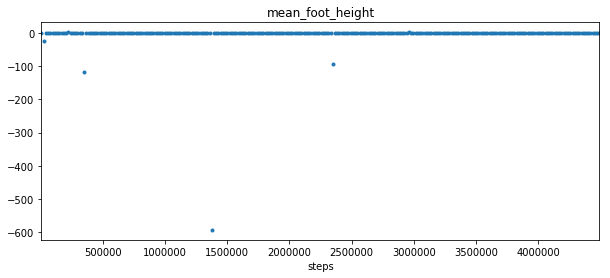

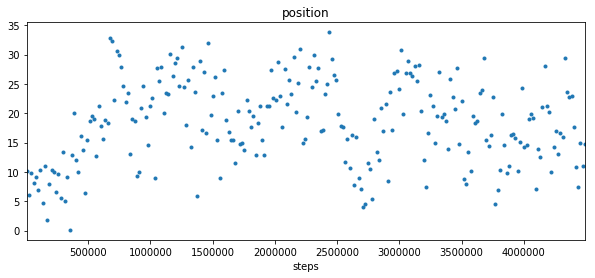

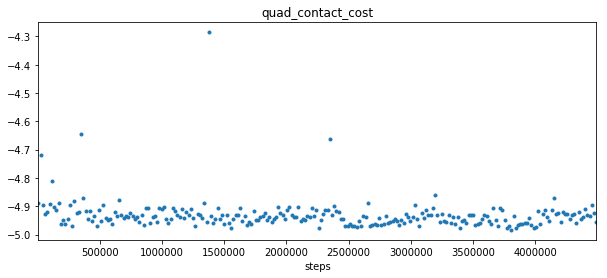

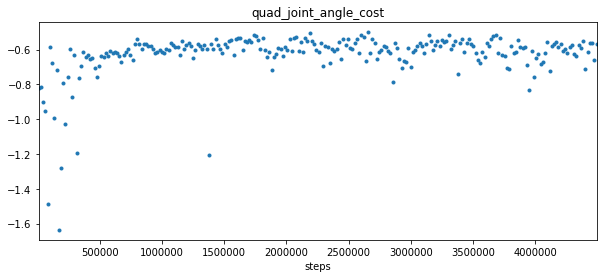

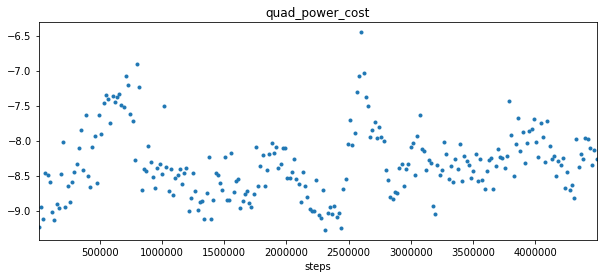

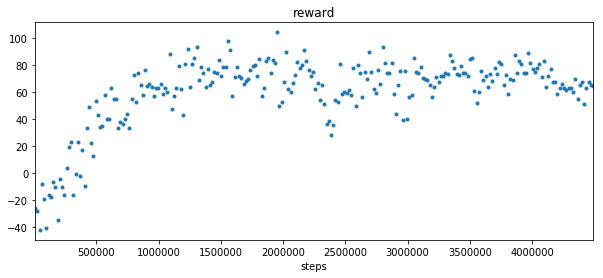

In [11]:
for col in df.columns:
    df[col].plot(style='.', title=col)
    plt.show()